# Gesture Detection Model

## 1 Engineer features

### 1.1 Import libraries and transformers  

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from keras.utils import to_categorical
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
import os
os.getcwd()

'C:\\Users\\p.schambach\\Desktop\\DSR\\drone_steering\\models'

In [3]:
os.chdir('..')

In [4]:
from app_local.module import DataEnsembler, LabelGenerator, GestureTransformer, DataResampler

### 1.2  Load data

In [5]:
de = DataEnsembler(ms_per_frame=120)
de.investigate_available_datafiles(data_dir='data/gesture/', is_frame_based = True)
de.combined_data_files_df

,filename_features,filename_labels
0,features_flip_c_01_120.csv,labels_flip_c_01.csv
1,features_flip_c_02_120.csv,labels_flip_c_02.csv
2,features_flip_c_03_120.csv,labels_flip_c_03.csv
3,features_flip_l_01_120.csv,labels_flip_l_01.csv
4,features_flip_l_02_120.csv,labels_flip_l_02.csv
5,features_flip_l_03_120.csv,labels_flip_l_03.csv
6,features_flip_p_01_120.csv,labels_flip_p_01.csv
7,features_land_c_01_120.csv,labels_land_c_01.csv
8,features_land_c_02_120.csv,labels_land_c_02.csv
9,features_land_c_03_120.csv,labels_land_c_03.csv


In [6]:
de.load_data()
de.assemble_data()

In [7]:
de.display_information()

i: 0 	shape X: (603, 18, 16) 	shape y: (603,) 	count: 49
i: 1 	shape X: (519, 18, 16) 	shape y: (519,) 	count: 37
i: 2 	shape X: (498, 18, 16) 	shape y: (498,) 	count: 59
i: 3 	shape X: (650, 18, 16) 	shape y: (650,) 	count: 138
i: 4 	shape X: (508, 18, 16) 	shape y: (508,) 	count: 95
i: 5 	shape X: (466, 18, 16) 	shape y: (466,) 	count: 90
i: 6 	shape X: (601, 18, 16) 	shape y: (601,) 	count: 107
i: 7 	shape X: (440, 18, 16) 	shape y: (440,) 	count: 83
i: 8 	shape X: (490, 18, 16) 	shape y: (490,) 	count: 70
i: 9 	shape X: (476, 18, 16) 	shape y: (476,) 	count: 74
i: 10 	shape X: (492, 18, 16) 	shape y: (492,) 	count: 85
i: 11 	shape X: (436, 18, 16) 	shape y: (436,) 	count: 59
i: 12 	shape X: (466, 18, 16) 	shape y: (466,) 	count: 86
i: 13 	shape X: (551, 18, 16) 	shape y: (551,) 	count: 127
i: 14 	shape X: (550, 18, 16) 	shape y: (550,) 	count: 114
i: 15 	shape X: (549, 18, 16) 	shape y: (549,) 	count: 115
i: 16 	shape X: (541, 18, 16) 	shape y: (541,) 	count: 92
i: 17 	shape X: (53

In [13]:
dr = DataResampler()

In [14]:
dr.fit(de.X, de.y)
X_test, y_test = dr.train_test_split(0.2)
dr.display_information()

,abs_orig,pct_orig,abs_current,pct_current
0,14998,82.46,11998,82.46
1,453,2.49,362,2.49
2,368,2.02,294,2.02
3,575,3.16,460,3.16
4,677,3.72,542,3.73
5,660,3.63,528,3.63
6,457,2.51,366,2.52


In [15]:
dr2 = DataResampler()
dr2.fit(dr.X, dr.y)
dr2.display_information()

,abs_orig,pct_orig,abs_current,pct_current
0,11998,82.46,11998,82.46
1,362,2.49,362,2.49
2,294,2.02,294,2.02
3,460,3.16,460,3.16
4,542,3.73,542,3.73
5,528,3.63,528,3.63
6,366,2.52,366,2.52


In [16]:
dr2.upsample(4000, exceptions=[0])
dr2.display_information()

,abs_orig,pct_orig,abs_current,pct_current
0,11998,82.46,11998,33.33
1,362,2.49,4000,11.11
2,294,2.02,4000,11.11
3,460,3.16,4000,11.11
4,542,3.73,4000,11.11
5,528,3.63,4000,11.11
6,366,2.52,4000,11.11


In [22]:
gt = GestureTransformer(feature_names = list(de.feature_names),byrow=True)
X_train = gt.transform(dr2.X)
y_train = to_categorical(dr2.y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(35998, 18, 16) (35998, 7) (3638, 18, 16) (3638,)


## 2 Train model

### 2.1  Split in train / test

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### 2.2 Define and compile model

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM

In [24]:
n_timesteps = X_train.shape[1] # here 18
n_features = X_train.shape[2] # here 16
n_outputs =  y_train.shape[1] # here 7 (number of labels)

model = Sequential()
model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.4))
model.add(Dense(100, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               46800     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 455       
Total params: 63,819
Trainable params: 63,819
Non-trainable params: 0
_________________________________________________________________


### 2.3 Fit and validate model

In [26]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

Epoch 1/100
35998/35998 [==============================] - 16s 450us/step - loss: 0.1494 - acc: 0.9524
Epoch 2/100
35998/35998 [==============================] - 16s 438us/step - loss: 0.1328 - acc: 0.9566
Epoch 3/100
35998/35998 [==============================] - 17s 474us/step - loss: 0.1253 - acc: 0.9609
Epoch 4/100
35998/35998 [==============================] - 17s 471us/step - loss: 0.1213 - acc: 0.9626
Epoch 5/100
35998/35998 [==============================] - 17s 486us/step - loss: 0.1163 - acc: 0.9639
Epoch 6/100
35998/35998 [==============================] - 17s 482us/step - loss: 0.1130 - acc: 0.9640
Epoch 7/100
35998/35998 [==============================] - 17s 474us/step - loss: 0.1081 - acc: 0.9660
Epoch 8/100
35998/35998 [==============================] - 17s 465us/step - loss: 0.1060 - acc: 0.9655
Epoch 9/100
35998/35998 [==============================] - 16s 438us/step - loss: 0.1035 - acc: 0.9659
Epoch 10/100
35998/35998 [==============================] - 16s 435us/ste

35998/35998 [==============================] - 16s 451us/step - loss: 0.0449 - acc: 0.9880
Epoch 80/100
35998/35998 [==============================] - 16s 449us/step - loss: 0.0422 - acc: 0.9883
Epoch 81/100
35998/35998 [==============================] - 16s 453us/step - loss: 0.0401 - acc: 0.9882
Epoch 82/100
35998/35998 [==============================] - 16s 448us/step - loss: 0.0405 - acc: 0.9886
Epoch 83/100
35998/35998 [==============================] - 16s 448us/step - loss: 0.0401 - acc: 0.9886
Epoch 84/100
35998/35998 [==============================] - 16s 449us/step - loss: 0.0402 - acc: 0.9884
Epoch 85/100
35998/35998 [==============================] - 16s 452us/step - loss: 0.0433 - acc: 0.9882
Epoch 86/100
35998/35998 [==============================] - 16s 449us/step - loss: 0.0396 - acc: 0.9884
Epoch 87/100
35998/35998 [==============================] - 16s 451us/step - loss: 0.0400 - acc: 0.9894
Epoch 88/100
35998/35998 [==============================] - 16s 449us/step - 

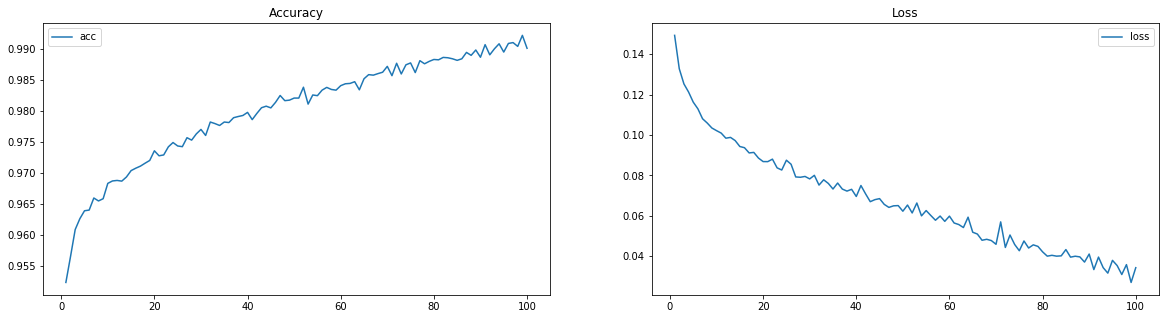

In [27]:
r = range(1, len(history.history["acc"]) + 1)

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(r, history.history["acc"], label="acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(r, history.history["loss"], label="loss")
plt.legend()
plt.title("Loss")

plt.show()
plt.close()

In [29]:
y_test = to_categorical(y_test)

eval_results = np.round(model.evaluate(X_test, y_test, batch_size=16, verbose=1),2)
print("Loss:     " + str(eval_results[0]))
print("Accuracy: " + str(eval_results[1]))

3638/3638 [==============================] - 1s 148us/step
Loss:     2.83
Accuracy: 0.82


In [30]:
for i in range(X_test.shape[0]):
    if (model.predict_classes(X_test[i:(i+1),:,:])[0]!=np.nonzero(y_test[i])[0][0]):
        print("Index:",i,\
              "\tPred:",model.predict_classes(X_test[i:(i+1),:,:])[0],\
              "\tActual:",np.nonzero(y_test[i])[0][0],\
              "\tProbability:",round(np.max(model.predict_proba(X_test[i:(i+1),:,:])),2))

Index: 1 	Pred: 0 	Actual: 2 	Probability: 1.0
Index: 18 	Pred: 0 	Actual: 4 	Probability: 1.0
Index: 31 	Pred: 0 	Actual: 2 	Probability: 1.0
Index: 32 	Pred: 0 	Actual: 5 	Probability: 1.0
Index: 39 	Pred: 0 	Actual: 6 	Probability: 1.0
Index: 40 	Pred: 0 	Actual: 3 	Probability: 1.0
Index: 44 	Pred: 0 	Actual: 3 	Probability: 1.0
Index: 50 	Pred: 0 	Actual: 6 	Probability: 1.0
Index: 51 	Pred: 0 	Actual: 3 	Probability: 1.0
Index: 53 	Pred: 0 	Actual: 5 	Probability: 1.0
Index: 60 	Pred: 0 	Actual: 2 	Probability: 1.0
Index: 69 	Pred: 0 	Actual: 3 	Probability: 1.0
Index: 72 	Pred: 0 	Actual: 5 	Probability: 1.0
Index: 76 	Pred: 0 	Actual: 4 	Probability: 1.0
Index: 80 	Pred: 0 	Actual: 4 	Probability: 1.0
Index: 115 	Pred: 0 	Actual: 1 	Probability: 1.0
Index: 116 	Pred: 0 	Actual: 5 	Probability: 1.0
Index: 119 	Pred: 0 	Actual: 6 	Probability: 1.0
Index: 121 	Pred: 0 	Actual: 5 	Probability: 1.0
Index: 132 	Pred: 0 	Actual: 5 	Probability: 1.0
Index: 135 	Pred: 0 	Actual: 4 	Prob

Index: 1022 	Pred: 0 	Actual: 5 	Probability: 1.0
Index: 1024 	Pred: 0 	Actual: 6 	Probability: 1.0
Index: 1026 	Pred: 0 	Actual: 3 	Probability: 1.0
Index: 1042 	Pred: 0 	Actual: 5 	Probability: 1.0
Index: 1049 	Pred: 0 	Actual: 3 	Probability: 1.0
Index: 1050 	Pred: 0 	Actual: 5 	Probability: 1.0
Index: 1051 	Pred: 0 	Actual: 6 	Probability: 1.0
Index: 1060 	Pred: 0 	Actual: 3 	Probability: 1.0
Index: 1078 	Pred: 0 	Actual: 4 	Probability: 1.0
Index: 1092 	Pred: 0 	Actual: 1 	Probability: 1.0
Index: 1106 	Pred: 0 	Actual: 5 	Probability: 1.0
Index: 1111 	Pred: 0 	Actual: 5 	Probability: 1.0
Index: 1114 	Pred: 0 	Actual: 5 	Probability: 1.0
Index: 1115 	Pred: 0 	Actual: 5 	Probability: 1.0
Index: 1116 	Pred: 0 	Actual: 3 	Probability: 1.0
Index: 1123 	Pred: 0 	Actual: 4 	Probability: 1.0
Index: 1124 	Pred: 0 	Actual: 6 	Probability: 1.0
Index: 1146 	Pred: 0 	Actual: 3 	Probability: 1.0
Index: 1148 	Pred: 0 	Actual: 5 	Probability: 1.0
Index: 1153 	Pred: 0 	Actual: 2 	Probability: 1.0


Index: 1967 	Pred: 0 	Actual: 4 	Probability: 1.0
Index: 1971 	Pred: 0 	Actual: 6 	Probability: 1.0
Index: 1975 	Pred: 0 	Actual: 1 	Probability: 1.0
Index: 1977 	Pred: 0 	Actual: 5 	Probability: 1.0
Index: 1982 	Pred: 0 	Actual: 4 	Probability: 1.0
Index: 1994 	Pred: 0 	Actual: 6 	Probability: 1.0
Index: 1998 	Pred: 0 	Actual: 6 	Probability: 1.0
Index: 1999 	Pred: 0 	Actual: 4 	Probability: 1.0
Index: 2009 	Pred: 0 	Actual: 3 	Probability: 1.0
Index: 2015 	Pred: 0 	Actual: 5 	Probability: 1.0
Index: 2016 	Pred: 0 	Actual: 6 	Probability: 1.0
Index: 2018 	Pred: 0 	Actual: 4 	Probability: 1.0
Index: 2021 	Pred: 0 	Actual: 3 	Probability: 1.0
Index: 2022 	Pred: 0 	Actual: 4 	Probability: 1.0
Index: 2028 	Pred: 0 	Actual: 5 	Probability: 1.0
Index: 2031 	Pred: 0 	Actual: 2 	Probability: 1.0
Index: 2035 	Pred: 0 	Actual: 5 	Probability: 1.0
Index: 2037 	Pred: 0 	Actual: 6 	Probability: 1.0
Index: 2040 	Pred: 0 	Actual: 3 	Probability: 1.0
Index: 2044 	Pred: 0 	Actual: 6 	Probability: 1.0


Index: 2920 	Pred: 0 	Actual: 6 	Probability: 1.0
Index: 2928 	Pred: 0 	Actual: 4 	Probability: 1.0
Index: 2948 	Pred: 0 	Actual: 1 	Probability: 1.0
Index: 2954 	Pred: 0 	Actual: 6 	Probability: 1.0
Index: 2957 	Pred: 0 	Actual: 5 	Probability: 1.0
Index: 2959 	Pred: 0 	Actual: 6 	Probability: 1.0
Index: 2961 	Pred: 0 	Actual: 1 	Probability: 1.0
Index: 2963 	Pred: 0 	Actual: 6 	Probability: 1.0
Index: 2971 	Pred: 0 	Actual: 3 	Probability: 1.0
Index: 2977 	Pred: 0 	Actual: 1 	Probability: 1.0
Index: 2978 	Pred: 0 	Actual: 6 	Probability: 1.0
Index: 2987 	Pred: 0 	Actual: 4 	Probability: 1.0
Index: 2989 	Pred: 0 	Actual: 5 	Probability: 1.0
Index: 2994 	Pred: 0 	Actual: 1 	Probability: 1.0
Index: 2995 	Pred: 0 	Actual: 4 	Probability: 1.0
Index: 2999 	Pred: 0 	Actual: 3 	Probability: 1.0
Index: 3009 	Pred: 0 	Actual: 4 	Probability: 1.0
Index: 3012 	Pred: 0 	Actual: 3 	Probability: 1.0
Index: 3023 	Pred: 0 	Actual: 6 	Probability: 1.0
Index: 3028 	Pred: 0 	Actual: 2 	Probability: 1.0


In [31]:
for i in range(X_test.shape[0]):
    if (model.predict_classes(X_test[i:(i+1),:,:])[0]==np.nonzero(y_test[i])[0][0]):
        print("Index:",i,\
              "\tPred:",model.predict_classes(X_test[i:(i+1),:,:])[0],\
              "\tActual:",np.nonzero(y_test[i])[0][0],\
              "\tProbability:",round(np.max(model.predict_proba(X_test[i:(i+1),:,:])),2))

Index: 0 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 9 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 10 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 11 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 12 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 13 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 14 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 15 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 16 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 17 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 19 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 20 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 21 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 22 	Pred: 0 	Actual: 0 	Probability: 1.0
I

Index: 214 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 215 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 216 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 217 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 218 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 219 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 220 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 221 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 222 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 223 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 224 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 225 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 226 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 227 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 228 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 229 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 230 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 231 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 232 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 233 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 234 	Pred: 0 

Index: 432 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 433 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 434 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 435 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 437 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 438 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 439 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 440 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 441 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 442 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 444 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 445 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 446 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 447 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 448 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 451 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 452 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 453 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 454 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 455 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 456 	Pred: 0 

Index: 633 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 635 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 636 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 637 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 638 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 639 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 640 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 641 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 642 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 643 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 644 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 645 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 646 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 647 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 648 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 649 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 650 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 651 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 652 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 653 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 654 	Pred: 0 

Index: 893 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 894 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 896 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 897 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 898 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 900 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 901 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 902 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 903 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 904 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 905 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 907 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 909 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 910 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 911 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 912 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 913 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 914 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 916 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 917 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 918 	Pred: 0 

Index: 1099 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1100 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1101 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1102 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1103 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1104 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1105 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1107 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1108 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1109 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1110 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1112 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1113 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1117 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1118 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1119 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1120 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1121 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1122 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1125 	Pred: 0 	Actual: 0 	Probability: 1.0


Index: 1303 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1304 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1306 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1307 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1308 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1309 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1310 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1311 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1312 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1313 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1314 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1315 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1316 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1317 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1318 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1319 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1320 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1322 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1323 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1324 	Pred: 0 	Actual: 0 	Probability: 1.0


Index: 1517 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1518 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1521 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1522 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1523 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1524 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1525 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1528 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1529 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1530 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1531 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1532 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1533 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1534 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1535 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1536 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1539 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1540 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1542 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1543 	Pred: 0 	Actual: 0 	Probability: 1.0


Index: 1732 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1733 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1735 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1736 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1738 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1739 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1740 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1741 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1743 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1745 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1746 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1747 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1748 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1749 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1750 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1751 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1752 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1753 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1754 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1755 	Pred: 0 	Actual: 0 	Probability: 1.0


Index: 1943 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1944 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1945 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1946 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1947 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1949 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1950 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1951 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1952 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1953 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1955 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1956 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1958 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1961 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1962 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1963 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1964 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1965 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1966 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1968 	Pred: 0 	Actual: 0 	Probability: 1.0


Index: 2151 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2152 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2153 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2154 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2155 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2156 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2158 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2159 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2160 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2162 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2163 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2165 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2167 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2168 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2169 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2170 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2172 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2173 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2174 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2175 	Pred: 0 	Actual: 0 	Probability: 1.0


Index: 2411 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2412 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2413 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2414 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2415 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2416 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2417 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2418 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2419 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2420 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2422 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2423 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2424 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2425 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2427 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2428 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2429 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2430 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2431 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2432 	Pred: 0 	Actual: 0 	Probability: 1.0


Index: 2633 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2635 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2636 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2637 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2638 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2639 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2640 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2641 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2642 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2643 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2645 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2646 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2647 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2649 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2651 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2652 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2653 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2655 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2656 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2657 	Pred: 0 	Actual: 0 	Probability: 1.0


Index: 2864 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2865 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2866 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2867 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2868 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2869 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2870 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2871 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2872 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2873 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2874 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2875 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2877 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2878 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2879 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2880 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2881 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2882 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2883 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2884 	Pred: 0 	Actual: 0 	Probability: 1.0


Index: 3087 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3088 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3089 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3090 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3091 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3092 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3093 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3095 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3096 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3097 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3100 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3101 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3102 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3103 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3104 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3105 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3106 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3107 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3108 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3109 	Pred: 0 	Actual: 0 	Probability: 1.0


Index: 3304 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3305 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3306 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3307 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3308 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3309 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3311 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3312 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3313 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3314 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3315 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3316 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3318 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3319 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3320 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3321 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3322 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3323 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3324 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3325 	Pred: 0 	Actual: 0 	Probability: 1.0


Index: 3516 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3517 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3518 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3519 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3520 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3521 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3523 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3524 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3525 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3526 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3527 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3529 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3530 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3531 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3533 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3534 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3535 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3536 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3537 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3538 	Pred: 0 	Actual: 0 	Probability: 1.0


In [52]:
E = np.eye(7)
counter = np.zeros(7)
y_comp = y_test.copy()

for i in range(y_comp.shape[0]):
    for j in range(7):
        if (y_comp[i,:] == E[j,:]).all():
            counter[j] += 1
            
counter

array([3000.,   91.,   74.,  115.,  135.,  132.,   91.])

### 2.4 Save model

In [53]:
from keras.models import load_model
import h5py
model.save('models/model_gesture_split20_up4000.h5')